In [2]:
!pip install config

In [3]:
import config
import requests

In [4]:
#imports key from config file
nyt_articles_api = config.nyt_articles_api
nyt_books_api = config.nyt_books_api
nyt_movie_api = config.nyt_movie_api 


response = requests.get('https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=' + nyt_articles_api + '?q=donald+trump')
data = response.json()

In [5]:
data.keys()

dict_keys(['response', 'copyright', 'status'])

In [6]:
data['response']

{'docs': [{'_id': '5786a15c38f0d80e646b3a0b',
   'abstract': None,
   'blog': [],
   'byline': {'original': 'By BEN STEINBAUER',
    'person': [{'firstname': 'Ben',
      'lastname': 'STEINBAUER',
      'organization': '',
      'rank': 1,
      'role': 'reported'}]},
   'document_type': 'article',
   'headline': {'content_kicker': 'Op-Docs',
    'kicker': 'Op-Docs',
    'main': 'Slow to Show'},
   'keywords': [{'is_major': 'N',
     'name': 'glocations',
     'rank': '1',
     'value': 'Odessa (Tex)'},
    {'is_major': 'N', 'name': 'subject', 'rank': '2', 'value': 'Automobiles'},
    {'is_major': 'N',
     'name': 'subject',
     'rank': '3',
     'value': 'Hispanic-Americans'},
    {'is_major': 'N',
     'name': 'subject',
     'rank': '4',
     'value': 'Documentary Films and Programs'}],
   'lead_paragraph': 'Every year, the city of Odessa, Tex., is witness to a strange phenomenon: cars that fly.',
   'multimedia': [],
   'news_desk': 'OpEd',
   'print_page': None,
   'pub_date': '

In [7]:
data['response']['docs']

[{'_id': '5786a15c38f0d80e646b3a0b',
  'abstract': None,
  'blog': [],
  'byline': {'original': 'By BEN STEINBAUER',
   'person': [{'firstname': 'Ben',
     'lastname': 'STEINBAUER',
     'organization': '',
     'rank': 1,
     'role': 'reported'}]},
  'document_type': 'article',
  'headline': {'content_kicker': 'Op-Docs',
   'kicker': 'Op-Docs',
   'main': 'Slow to Show'},
  'keywords': [{'is_major': 'N',
    'name': 'glocations',
    'rank': '1',
    'value': 'Odessa (Tex)'},
   {'is_major': 'N', 'name': 'subject', 'rank': '2', 'value': 'Automobiles'},
   {'is_major': 'N',
    'name': 'subject',
    'rank': '3',
    'value': 'Hispanic-Americans'},
   {'is_major': 'N',
    'name': 'subject',
    'rank': '4',
    'value': 'Documentary Films and Programs'}],
  'lead_paragraph': 'Every year, the city of Odessa, Tex., is witness to a strange phenomenon: cars that fly.',
  'multimedia': [],
  'news_desk': 'OpEd',
  'print_page': None,
  'pub_date': '2016-08-12T00:00:00Z',
  'section_name'

In [8]:
#for item in data['response']['docs']:
 #   print(item)

In [10]:
import pandas as pd

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/Monica/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [11]:
import numpy as np
social_sites = ["Twitter", "Facebook", "Instagram", "MySpace", "Tumblr", "Snapchat"]
social_df = pd.read_csv("social_hits.csv", encoding='latin-1')
for social in social_sites:
    #start_date = 20000101  
    #end_date = 20001231
    start_date = 20050101  
    end_date = 20051231
    array=[]

    for n in [1,2,3,4,5,6, 7,8,9,10,11]:
        if (n <= 10):
            start_date = start_date + 10000
            #print(start_date)
            end_date = end_date + 10000
            #print(end_date)
        else:
            # start_date = start_date + 100000
            start_date = 20160101
            #print(start_date)
            end_date = 20160730
            #print(end_date)


        response = requests.get('https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=' + nyt_articles_api + '&q=' + social + '&begin_date=' +  str(start_date)   + '&end_date=' +  str(end_date)+ '&sort=oldest')

        social_data = response.json()  
        social_hits = social_data['response']['meta']['hits']

        start_str = str(start_date)
        start_str = start_str[:4]

        end_str = str(end_date)
        end_str = end_str[:4]
        
        social_df = social_df.append({"year": end_str, "hits": social_hits, "social_site": social}, ignore_index=True)
        #array.append({"year": end_str, "hits": social_hits, "social_site": social})
        print("There were", social_hits, "mentions of", social, "in", end_str)
        #print(array)
    #social_df.append(array)
        



There were 6 mentions of Twitter in 2006
There were 38 mentions of Twitter in 2007
There were 415 mentions of Twitter in 2008
There were 2738 mentions of Twitter in 2009
There were 3752 mentions of Twitter in 2010
There were 6839 mentions of Twitter in 2011
There were 7843 mentions of Twitter in 2012
There were 7134 mentions of Twitter in 2013
There were 13368 mentions of Twitter in 2014
There were 13883 mentions of Twitter in 2015
There were 9533 mentions of Twitter in 2016
There were 117 mentions of Facebook in 2006
There were 553 mentions of Facebook in 2007
There were 961 mentions of Facebook in 2008
There were 2249 mentions of Facebook in 2009
There were 3287 mentions of Facebook in 2010
There were 5918 mentions of Facebook in 2011
There were 6177 mentions of Facebook in 2012
There were 5057 mentions of Facebook in 2013
There were 8203 mentions of Facebook in 2014
There were 10289 mentions of Facebook in 2015
There were 6790 mentions of Facebook in 2016
There were 0 mentions of In

In [12]:
ax = social_df.plot(kind='barh', x='Twitter', y='Index Week', alpha=0.5)

KeyError: 'Twitter'

In [ ]:
social_df.groupby('social_site')['hits'].hist(bins=50)

In [ ]:
social_df.info()

In [ ]:
social_df.head()

In [ ]:
# recent_social_df = social_df[social_df['year'] > 2005]

In [ ]:
fig, ax = plt.subplots()
for sitename, selection in social_df.groupby('social_site'):
    ax.plot(selection['year'], selection['hits'],label=sitename)
ax.legend()

In [ ]:
fig, ax = plt.subplots()
for sitename, selection in social_df.groupby('social_site'):
    ax.plot(selection['year'], selection['hits'],label=sitename, interpolate=True)
ax.legend(loc=2)
plt.savefig('social_over_time.pdf')

In [ ]:
#s ocial_df.groupby('social_site')['hits'].plot(legend=True,x='year')

In [ ]:
#social_df.groupby('social_site')['hits'].plot(kind="bar",y="year", color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'])
social_df.groupby('social_site')['hits'].plot()

In [ ]:
#data = response.json()

In [ ]:
social_df.describe()
social_df.to_csv("NYT_Social_hits", sep='\t')

In [ ]:
#data.keys()

In [192]:
#data['response']

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
#df = pd.read_csv("cleaned_socialmediapopularity.csv", encoding='latin-1')

In [193]:
#df.head

In [194]:
#df.describe()

In [178]:
# df

In [195]:
#df.columns

In [104]:
import datetime

In [177]:
# df['Week'] = df['Week'].apply(dateutil.parser.parse)

In [94]:
df['Week'].describe()

count                         656
unique                        656
top       2010-08-22 - 2010-08-28
freq                            1
Name: Week, dtype: object

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 7 columns):
Week          656 non-null object
Twitter       656 non-null float64
Facebook      656 non-null float64
Snapchat      656 non-null float64
Instagram     656 non-null float64
myspace       656 non-null float64
Index Week    656 non-null float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [209]:
#df=df.astype(float)

In [207]:
#df.index = df['Week']

In [206]:
#df.resample('M').count()

In [208]:
#ax = df.plot(kind='barh', x='Twitter', y='Index Week', alpha=0.5)

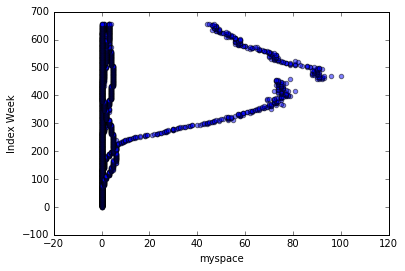

In [121]:
ax = df.plot(kind='scatter', x='Twitter', y='Index Week', alpha=0.5)
df.plot(kind='scatter', x='Facebook', y='Index Week', alpha=0.5, ax=ax)
df.plot(kind='scatter', x='Snapchat', y='Index Week', alpha=0.5, ax=ax)
df.plot(kind='scatter', x='Instagram', y='Index Week', alpha=0.5, ax=ax)
df.plot(kind='scatter', x='myspace', y='Index Week', alpha=0.5, ax=ax)


In [ ]:
import datetime

,Week,Twitter,Facebook,Snapchat,Instagram,myspace
0,2004-01-04 - 2004-01-10,0,0,0,0,0
1,2004-01-11 - 2004-01-17,0,0,0,0,0
2,2004-01-18 - 2004-01-24,0,0,0,0,0
3,2004-01-25 - 2004-01-31,0,0,0,0,0
4,2004-02-01 - 2004-02-07,0,0,0,0,0
5,2004-02-08 - 2004-02-14,0,0,0,0,0
6,2004-02-15 - 2004-02-21,0,0,0,0,0
7,2004-02-22 - 2004-02-28,0,0,0,0,0
8,2004-02-29 - 2004-03-06,0,0,0,0,0
9,2004-03-07 - 2004-03-13,0,0,0,0,0
